In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# 이탈 기준 설정하기

## RFM
R: Recency 최근 주문일
F: Frequency 주문수
M: Monetary 총 구매 금액

In [150]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
product_category_name_df = pd.read_csv('data/product_category_name_translation.csv')



print(customers_df.shape, orders_df.shape, order_payments_df.shape)

(99441, 5) (99441, 8) (103886, 5)


In [151]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [152]:
# orders_df + customers_df 병합
df = pd.merge(orders_df, customers_df[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
df = pd.merge(df, order_payments_df, on='order_id', how='left')
df = pd.merge(df, order_items_df, on='order_id', how='left')
products_df = products_df.dropna(axis=0)
df = pd.merge(df, products_df, on='product_id', how='inner')
df = pd.merge(df, product_category_name_df, on='product_category_name', how='left')
df.dropna(axis=0, inplace=True)
df = pd.merge(df, order_reviews_df, on='order_id', how='inner')

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,payment_sequential,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,1.0,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3.0,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,2.0,...,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,1.0,...,19.0,13.0,19.0,perfumery,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,1.0,...,24.0,19.0,21.0,auto,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,1.0,...,40.0,10.0,40.0,baby,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
113189,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,1.0,...,32.0,90.0,22.0,home_appliances_2,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
113190,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,1.0,...,20.0,20.0,20.0,computers_accessories,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
113191,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,1.0,...,20.0,20.0,20.0,computers_accessories,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [153]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])


df['review_comment_title'] = df['review_comment_title'].fillna('')
df['review_comment_message'] = df['review_comment_message'].fillna('')



df['review_flag'] = np.where(
    (df['review_comment_title'] == '') & (df['review_comment_message'] == ''),
    0,
    1
)

df['review_length'] = df['review_comment_message'].apply(lambda x: len(str(x)))

In [154]:
# 날짜 컬럼을 datetime 형식으로 변환
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])

# 날짜 차이 계산 (답변까지 걸린 시간)
df['response_time'] = df['review_answer_timestamp'] - df['review_creation_date']

In [155]:

# 결제 승인 까지 걸린 시간
df['approval_days'] = (
    df['order_approved_at'] - df['order_purchase_timestamp']
).dt.days + 1

# 총 소요시간(구매~배송완료까지)
df['total_days'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days + 1

# 배송 지연
# delay_days > 0 : 지연배송 이탈 가능성 높음
# delay_days < 0 : 조기배송 이탈 가능성 낮음
df['delay_days'] = (
    df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
).dt.days


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113193 entries, 0 to 113192
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       113193 non-null  object         
 1   customer_id                    113193 non-null  object         
 2   order_status                   113193 non-null  object         
 3   order_purchase_timestamp       113193 non-null  datetime64[ns] 
 4   order_approved_at              113193 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   113193 non-null  object         
 6   order_delivered_customer_date  113193 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  113193 non-null  datetime64[ns] 
 8   customer_unique_id             113193 non-null  object         
 9   payment_sequential             113193 non-null  float64        
 10  payment_type                   113193 non-null  object  

In [157]:
df['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [158]:
category_by_customer = (
    df.groupby('customer_unique_id')['product_category_name_english']
    .agg(lambda x: ','.join(sorted(set(x.dropna().astype(str)))))
    .reset_index()
)

category_by_customer
df['category_num'] = category_by_customer['product_category_name_english'].str.count(',')

df['order_status_binary'] = df['order_status'].map({
    'delivered': 0,
    'canceled': 1
})



In [159]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
customer_unique_id                   0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm        

In [160]:
len(df)

113193

In [161]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,payment_sequential,...,review_creation_date,review_answer_timestamp,review_flag,review_length,response_time,approval_days,total_days,delay_days,category_num,order_status_binary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,1.0,...,2017-10-11,2017-10-12 03:43:48,1,170,1 days 03:43:48,1,9,7,0.0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3.0,...,2017-10-11,2017-10-12 03:43:48,1,170,1 days 03:43:48,1,9,7,0.0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2.0,...,2017-10-11,2017-10-12 03:43:48,1,170,1 days 03:43:48,1,9,7,0.0,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,1.0,...,2018-08-08,2018-08-08 18:37:50,1,20,0 days 18:37:50,2,14,5,0.0,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,1.0,...,2018-08-18,2018-08-22 19:07:58,0,0,4 days 19:07:58,1,10,17,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,1.0,...,2018-03-01,2018-03-02 17:50:01,1,44,1 days 17:50:01,1,23,1,NaN,0
113189,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,1.0,...,2017-09-22,2017-09-22 23:10:57,1,28,0 days 23:10:57,1,25,5,NaN,0
113190,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,1.0,...,2018-01-26,2018-01-27 09:16:56,1,53,1 days 09:16:56,1,18,20,NaN,0
113191,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,1.0,...,2018-01-26,2018-01-27 09:16:56,1,53,1 days 09:16:56,1,18,20,NaN,0


In [162]:
# RFM 계산
rfm_df = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': pd.Series.nunique,
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

# 기존 데이터에 RFM을 병합
payments_orders_customers_with_rfm = df.merge(
    rfm_df,
    how='left',
    on='customer_unique_id'
)

# 확인
payments_orders_customers_with_rfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113193 entries, 0 to 113192
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       113193 non-null  object         
 1   customer_id                    113193 non-null  object         
 2   order_status                   113193 non-null  object         
 3   order_purchase_timestamp       113193 non-null  datetime64[ns] 
 4   order_approved_at              113193 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   113193 non-null  object         
 6   order_delivered_customer_date  113193 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  113193 non-null  datetime64[ns] 
 8   customer_unique_id             113193 non-null  object         
 9   payment_sequential             113193 non-null  float64        
 10  payment_type                   113193 non-null  object  

In [163]:
# 날짜형 변경 후 경과일 계산
rfm_df['Recency'] = pd.to_datetime(rfm_df['Recency'])
max_date = rfm_df['Recency'].max()
rfm_df['Recency'] = max_date - rfm_df['Recency']

rfm_df['Recency'] = rfm_df['Recency'].dt.days +1
rfm_df.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89


### F_score

In [164]:
# 빈도수 구간 설정 및 범주 이름 지정
bins = [0, 2, 5, float('inf')] # 0~2: lowl / 3~5: mid / 6~: high
labels = ['low', 'mid', 'high']

# 구간화
rfm_df['Frequency_level'] = pd.cut(rfm_df['Frequency'], bins=bins, labels=labels)
rfm_df.head()

,Recency,Frequency,Monetary,Frequency_level
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,low
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,low
0000f46a3911fa3c0805444483337064,537,1,86.22,low
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,low
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,low


In [165]:
# Frequency_level 재정의
f_score_map = {
    'low': 1,
    'mid': 3,
    'high': 5
}
# 카테고리 컬럼을 문자열로 변환 후 매핑
rfm_df.info()
rfm_df['F_score'] = rfm_df['Frequency_level'].astype(str).map(f_score_map).fillna(2).astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 91465 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          91465 non-null  int64   
 1   Frequency        91465 non-null  int64   
 2   Monetary         91465 non-null  float64 
 3   Frequency_level  91465 non-null  category
dtypes: category(1), float64(1), int64(2)
memory usage: 2.9+ MB


### R_score, M_score

In [166]:
# 분위수 구간 계산 (NaN 발생 대비 + 분위수 구간 부족 대비)
for col in ['Recency', 'Monetary']:
    try:
        rfm_df[col[0] + '_quantile'] = pd.qcut(
            rfm_df[col],
            5,
            labels=False,
            duplicates='drop'
        )
    except ValueError:
        # 전부 동일하거나 분위수 계산 불가한 경우 → 값 전체를 중간값으로 처리
        rfm_df[col[0] + '_quantile'] = 2

# NaN이 생긴 경우 기본값 2로 대체
rfm_df[['R_quantile', 'M_quantile']] = rfm_df[['R_quantile', 'M_quantile']].fillna(2)

# RFM 점수 계산
rfm_df['R_score'] = (5 - rfm_df['R_quantile']).astype(int)  # Recency는 낮을수록 높게
rfm_df['M_score'] = (1 + rfm_df['M_quantile']).astype(int)

# 최종 RFM Score 조합
rfm_df['RFM_add_score'] = (
    rfm_df['R_score']+ #.astype(str) +
    rfm_df['F_score']+ #.astype(str) +
    rfm_df['M_score']#.astype(str)
)

# 결과 출력
print(rfm_df[['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_add_score']])

                                  Recency  Frequency  Monetary  R_score  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90        4   
0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19        4   
0000f46a3911fa3c0805444483337064      537          1     86.22        1   
0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62        2   
0004aac84e0df4da2b147fca70cf8255      288          1    196.89        2   
...                                   ...        ...       ...      ...   
fffcf5a5ff07b0908bd4e2dbc735a684      447          1   4134.84        1   
fffea47cd6d3cc0a88bd621562a9d061      262          1     84.58        3   
ffff371b4d645b6ecea244b27531430a      568          1    112.46        1   
ffff5962728ec6157033ef9805bacc48      119          1    133.69        4   
ffffd2657e2aad2907e67c3e9daecbeb      484          1     71.56        1   

                        

In [167]:
import numpy as np

# 로그 변환 + 정규화
rfm_df['R_log'] = np.log1p(rfm_df['Recency'])     # log1p = log(1 + x)
rfm_df['F_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['M_log'] = np.log1p(rfm_df['Monetary'])

# 정규화 (0~1 스케일)
rfm_df['R_norm'] = rfm_df['R_log'] / rfm_df['R_log'].max()
rfm_df['F_norm'] = rfm_df['F_log'] / rfm_df['F_log'].max()
rfm_df['M_norm'] = rfm_df['M_log'] / rfm_df['M_log'].max()

# 가중치 정의 (작게)
weights = {'R': 0.1, 'F': 0.1, 'M': 0.1}

# weighted score (작은 값 유지)
rfm_df['RFM_score'] = (
    weights['R'] * rfm_df['R_norm'] +
    weights['F'] * rfm_df['F_norm'] +
    weights['M'] * rfm_df['M_norm']
)


#
# from sklearn.preprocessing import StandardScaler
#
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])
# rfm_df[['R_z', 'F_z', 'M_z']] = rfm_scaled
#
# # 가중치 부여 (아주 작은 비율)
# rfm_df['RFM_score'] = 0.05 * rfm_df['R_z'] + 0.05 * rfm_df['F_z'] + 0.05 * rfm_df['M_z']


<Axes: xlabel='RFM_add_score', ylabel='Count'>

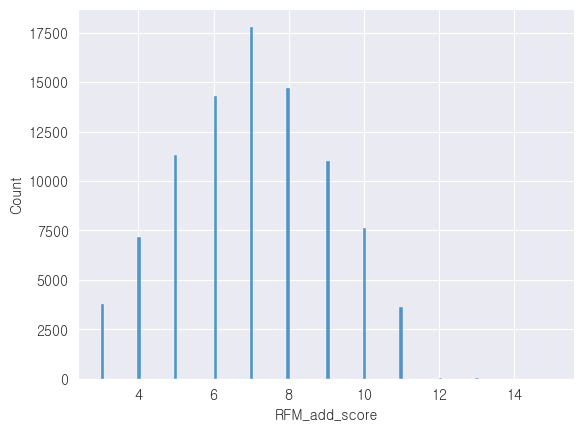

In [168]:
sns.histplot(rfm_df['RFM_add_score'])
# 5까지는

In [169]:
def rfm_segment(score):
    if score >= 10:
        return 'Champion'
    elif score >= 8:
        return 'Loyal Customer'
    elif score >= 6:
        return 'Potential Loyalist'
    elif score >= 4:
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm_df['RFM_segment'] = rfm_df['RFM_add_score'].apply(rfm_segment)
rfm_df['RFM_segment']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2        Loyal Customer
0000b849f77a49e4a4ce2b2a4ca5be3f    Potential Loyalist
0000f46a3911fa3c0805444483337064       Needs Attention
0000f6ccb0745a6a4b88665a16c9f078       Needs Attention
0004aac84e0df4da2b147fca70cf8255    Potential Loyalist
                                           ...        
fffcf5a5ff07b0908bd4e2dbc735a684    Potential Loyalist
fffea47cd6d3cc0a88bd621562a9d061    Potential Loyalist
ffff371b4d645b6ecea244b27531430a       Needs Attention
ffff5962728ec6157033ef9805bacc48        Loyal Customer
ffffd2657e2aad2907e67c3e9daecbeb       Needs Attention
Name: RFM_segment, Length: 91465, dtype: object

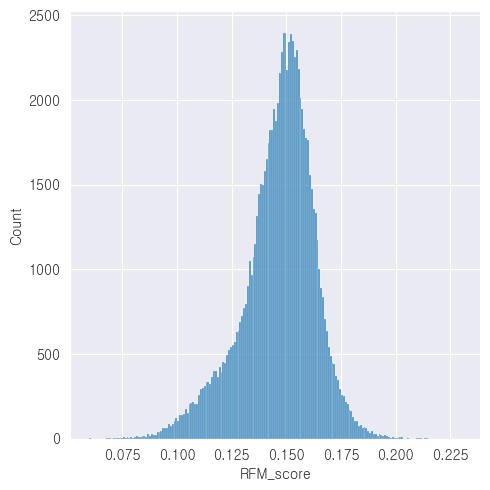

In [170]:
sns.displot(rfm_df['RFM_score'])

In [172]:
print(rfm_df['R_score'].value_counts(), '\n')
print(rfm_df['F_score'].value_counts(), '\n')
print(rfm_df['M_score'].value_counts(), '\n')

R_score
3    18420
5    18405
4    18283
1    18236
2    18121
Name: count, dtype: int64 

F_score
1    91250
3      207
5        8
Name: count, dtype: int64 

M_score
3    18307
1    18298
2    18291
5    18291
4    18278
Name: count, dtype: int64 



### 이탈 기준

In [173]:
# # R <= 2 and F <= 2 인 경우, 이탈
# rfm_df['churn'] = rfm_df.apply(
#     lambda x: 1 if (x['R_score'] <= 2 and x['F_score'] <= 2) else 0,
#     axis=1
# )
# rfm_df = rfm_df.reset_index()
# rfm_df.head()


# RFM_score로 이탈여부
rfm_df['churn'] = rfm_df.apply(
    lambda x: 1 if (x['RFM_score'] <=0.15) else 0,
    axis=1
)
rfm_df = rfm_df.reset_index()
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,RFM_add_score,R_log,F_log,M_log,R_norm,F_norm,M_norm,RFM_score,RFM_segment,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,low,1,1,3,4,4,9,4.727388,0.693147,4.962145,0.722251,0.255958,0.427698,0.140591,Loyal Customer,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,low,1,1,0,4,1,6,4.753590,0.693147,3.338967,0.726255,0.255958,0.287793,0.127001,Potential Loyalist,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,low,1,4,1,1,2,4,6.287859,0.693147,4.468434,0.960660,0.255958,0.385144,0.160176,Needs Attention,0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,low,1,3,0,2,1,4,5.774552,0.693147,3.798182,0.882237,0.255958,0.327374,0.146557,Needs Attention,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,low,1,3,3,2,4,7,5.666427,0.693147,5.287711,0.865718,0.255958,0.455760,0.157744,Potential Loyalist,0


In [174]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91465 entries, 0 to 91464
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  91465 non-null  object  
 1   Recency             91465 non-null  int64   
 2   Frequency           91465 non-null  int64   
 3   Monetary            91465 non-null  float64 
 4   Frequency_level     91465 non-null  category
 5   F_score             91465 non-null  int64   
 6   R_quantile          91465 non-null  int64   
 7   M_quantile          91465 non-null  int64   
 8   R_score             91465 non-null  int64   
 9   M_score             91465 non-null  int64   
 10  RFM_add_score       91465 non-null  int64   
 11  R_log               91465 non-null  float64 
 12  F_log               91465 non-null  float64 
 13  M_log               91465 non-null  float64 
 14  R_norm              91465 non-null  float64 
 15  F_norm              91465 non-null  

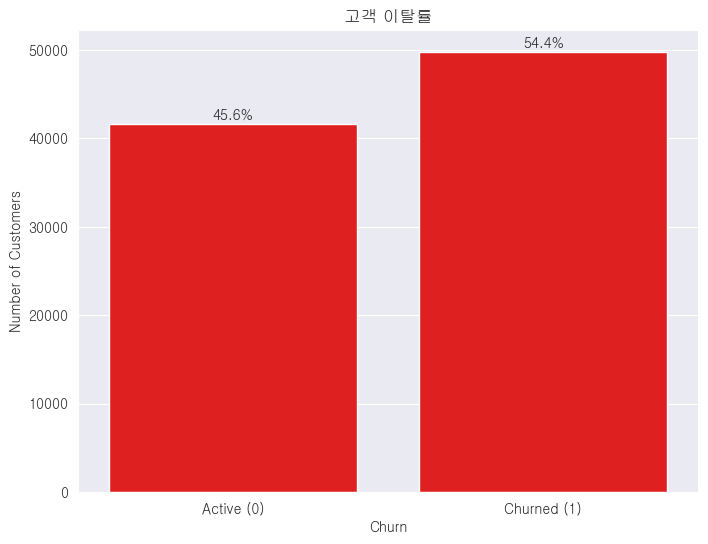

In [175]:
# 시각화
churn_counts = rfm_df['churn'].value_counts().sort_index()
total = churn_counts.sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, color='red')
plt.xticks([0,1], ['Active (0)', 'Churned (1)'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('고객 이탈률')

# 막대 위에 비율 표시
for i, count in enumerate(churn_counts.values):
    percent = count / total * 100
    plt.text(i, count+500, f'{percent:.1f}%', ha='center')

plt.show()

## 배송 변수 병합 및 준비 (* 피처 생성)

#### 변수 병합

In [176]:
# cols_to_drop = ['delay_days', 'total_days', 'approval_days']
# rfm_df.drop(columns=cols_to_drop, inplace=True)
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91465 entries, 0 to 91464
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  91465 non-null  object  
 1   Recency             91465 non-null  int64   
 2   Frequency           91465 non-null  int64   
 3   Monetary            91465 non-null  float64 
 4   Frequency_level     91465 non-null  category
 5   F_score             91465 non-null  int64   
 6   R_quantile          91465 non-null  int64   
 7   M_quantile          91465 non-null  int64   
 8   R_score             91465 non-null  int64   
 9   M_score             91465 non-null  int64   
 10  RFM_add_score       91465 non-null  int64   
 11  R_log               91465 non-null  float64 
 12  F_log               91465 non-null  float64 
 13  M_log               91465 non-null  float64 
 14  R_norm              91465 non-null  float64 
 15  F_norm              91465 non-null  

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113193 entries, 0 to 113192
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       113193 non-null  object         
 1   customer_id                    113193 non-null  object         
 2   order_status                   113193 non-null  object         
 3   order_purchase_timestamp       113193 non-null  datetime64[ns] 
 4   order_approved_at              113193 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   113193 non-null  object         
 6   order_delivered_customer_date  113193 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  113193 non-null  datetime64[ns] 
 8   customer_unique_id             113193 non-null  object         
 9   payment_sequential             113193 non-null  float64        
 10  payment_type                   113193 non-null  object  

In [178]:
# unique_id 에 맞춰 평균으로 처리
for_model_df = df.groupby('customer_unique_id').agg({
    'delay_days': 'mean',
    'total_days': 'mean',
    'approval_days': 'mean',
    'review_flag': 'sum',
    'review_length': 'mean',
    'order_status_binary':'sum',
    'category_num':'sum'



}).reset_index()
for_model_df.head()
print(f'deliver_df 평균처리 후 개수: {len(for_model_df)}')

# rfm 테이블 병합
# 배송정보 있는 고객만 체크
rfm_df = rfm_df.merge(
    for_model_df,
    on='customer_unique_id',
    how='inner'
)
rfm_df.head()
print(f'model_df 병합 후 개수: {len(rfm_df)}')

deliver_df 평균처리 후 개수: 91465
model_df 병합 후 개수: 91465


In [179]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91465 entries, 0 to 91464
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customer_unique_id   91465 non-null  object  
 1   Recency              91465 non-null  int64   
 2   Frequency            91465 non-null  int64   
 3   Monetary             91465 non-null  float64 
 4   Frequency_level      91465 non-null  category
 5   F_score              91465 non-null  int64   
 6   R_quantile           91465 non-null  int64   
 7   M_quantile           91465 non-null  int64   
 8   R_score              91465 non-null  int64   
 9   M_score              91465 non-null  int64   
 10  RFM_add_score        91465 non-null  int64   
 11  R_log                91465 non-null  float64 
 12  F_log                91465 non-null  float64 
 13  M_log                91465 non-null  float64 
 14  R_norm               91465 non-null  float64 
 15  F_norm             

## 모델링

### 데이터 준비

In [191]:
model_df = rfm_df

In [192]:
model_df.head()
# model_df.describe()

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,...,RFM_score,RFM_segment,churn,delay_days,total_days,approval_days,review_flag,review_length,order_status_binary,category_num
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,low,1,1,3,4,4,...,0.140591,Loyal Customer,1,4.0,7.0,1.0,1,111.0,0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,low,1,1,0,4,1,...,0.127001,Potential Loyalist,1,4.0,4.0,1.0,0,0.0,0,0.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,low,1,4,1,1,2,...,0.160176,Needs Attention,0,1.0,26.0,1.0,0,0.0,0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,low,1,3,0,2,1,...,0.146557,Needs Attention,1,11.0,21.0,1.0,1,12.0,0,0.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,low,1,3,3,2,4,...,0.157744,Potential Loyalist,0,7.0,14.0,1.0,0,0.0,0,0.0


In [193]:
model_df.columns

Index(['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
       'Frequency_level', 'F_score', 'R_quantile', 'M_quantile', 'R_score',
       'M_score', 'RFM_add_score', 'R_log', 'F_log', 'M_log', 'R_norm',
       'F_norm', 'M_norm', 'RFM_score', 'RFM_segment', 'churn', 'delay_days',
       'total_days', 'approval_days', 'review_flag', 'review_length',
       'order_status_binary', 'category_num'],
      dtype='object')

In [194]:
# model_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary','F_score','R_score','M_score', 'RFM_add_score','RFM_score', 'RFM_segment', 'churn', 'delay_days', 'total_days', 'approval_days', 'review_flag', 'review_length','order_status_binary', 'category_num']].to_csv('model_df.csv')

In [205]:
# 사용 변수 (RFM + 배송관련 변수)
features = ['Frequency', 'Monetary', 'delay_days', 'total_days', 'approval_days','review_flag','review_length', 'order_status_binary', 'category_num']

# 타겟 변수
target = 'churn'

X = model_df[features]
y = model_df[target]

# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled, columns=features).head()
# pd.DataFrame(X_train, columns=features).head()

(73172, 9) (73172,)
(18293, 9) (18293,)


,Frequency,Monetary,delay_days,total_days,approval_days,review_flag,review_length,order_status_binary,category_num
0,-0.160422,-0.018447,-0.385931,-0.848473,-0.360064,0.586484,0.392070,-0.008626,-0.148045
1,-0.160422,-0.218567,-0.286894,-0.953921,-0.360064,-0.677520,-0.581367,-0.008626,-0.148045
2,-0.160422,-0.248704,-1.475340,-0.004886,-0.360064,0.586484,-0.327427,-0.008626,-0.148045
3,-0.160422,-0.157376,-1.673414,0.206010,-0.360064,-0.677520,-0.581367,-0.008626,-0.148045
4,-0.160422,-0.177842,0.208292,-0.637576,-0.360064,-0.677520,-0.581367,-0.008626,-0.148045


### 모델 학습 및 예측

In [206]:
# !pip install xgboost

In [207]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1. 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# 2. GridSearchCV 파라미터 정의 (★ xgb__prefix 필수!)
param_grid = {
    'xgb__n_estimators': [100, 300],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# 3. GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # 회귀면 'neg_mean_squared_error'
    cv=3,
    n_jobs=-1,
    verbose=1
)

# 4. 학습
grid_search.fit(X_train_scaled, y_train)

# 5. 결과 확인
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\playdata\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:49:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}
Best Score: 0.7226534989305451


In [208]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 예측값
y_pred = grid_search.predict(X_test_scaled)

# 정확도
print("Accuracy:", accuracy_score(y_test, y_pred))

# 정밀도
print("Precision:", precision_score(y_test, y_pred))

# 재현율
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# ROC AUC (이진 분류만)
y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# 분류 리포트 및 혼동행렬
print("\n[Classification Report]")
print(classification_report(y_test, y_pred))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7262340786093041
Precision: 0.7415763258130676
Recall: 0.7627322953289805
F1 Score: 0.7520055462018421
ROC AUC: 0.8053068744586909

[Classification Report]
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      8338
           1       0.74      0.76      0.75      9955

    accuracy                           0.73     18293
   macro avg       0.72      0.72      0.72     18293
weighted avg       0.73      0.73      0.73     18293


[Confusion Matrix]
[[5692 2646]
 [2362 7593]]


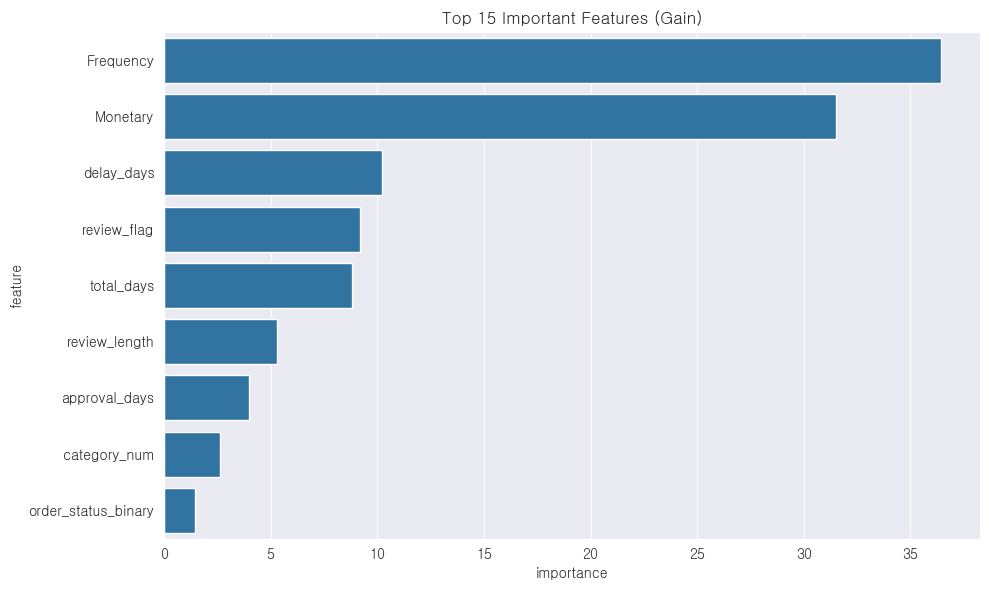

In [209]:
# 3. Feature Importance 추출 및 시각화
# 최적 모델 추출
best_model = grid_search.best_estimator_
xgb_model = best_model.named_steps['xgb']
importances = xgb_model.get_booster().get_score(importance_type='gain')

# f0, f1 등을 실제 변수명으로 매핑
feature_names = X_train.columns  # 또는 X_test.columns, 동일한 열이라면
importances_named = {
    feature_names[int(k[1:])]: v for k, v in importances.items()
}

importance_df = pd.DataFrame({
    'feature': list(importances_named.keys()),
    'importance': list(importances_named.values())
}).sort_values(by='importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Top 15 Important Features (Gain)')
plt.tight_layout()
plt.show()


# GridSearch

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle

# 모델 및 파라미터 정의 (확장 버전)
models_and_params = {
    # 'XGBoost': {
    #     'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    #     'params': {
    #         'model__n_estimators': [100, 200, 300],
    #         'model__max_depth': [3, 5, 7],
    #         'model__learning_rate': [0.01, 0.05, 0.1],
    #         'model__subsample': [0.6, 0.8, 1.0],
    #         'model__colsample_bytree': [0.6, 0.8, 1.0],
    #         'model__gamma': [0, 1, 5],
    #         'model__reg_alpha': [0, 0.1, 1],
    #         'model__reg_lambda': [1, 5, 10]
    #     }
    #},
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [-1, 5, 10],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__subsample': [0.6, 0.8, 1.0],
            'model__colsample_bytree': [0.6, 0.8, 1.0],
            'model__num_leaves': [31, 50, 100],
            'model__reg_alpha': [0, 0.1, 1],
            'model__reg_lambda': [0, 1, 5]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': ['sqrt', 'log2', None],
            'model__bootstrap': [True, False]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'model__C': [0.01, 0.1, 1.0, 10],
            'model__penalty': ['l1', 'l2', 'elasticnet'],
            'model__solver': ['saga'],
            'model__l1_ratio': [None, 0.5, 1.0]  # Only used if penalty='elasticnet'
        }
    }
}

# 학습 및 저장
for name, config in models_and_params.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        scoring='accuracy',
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    print(f"[{name}] Best Params:", grid.best_params_)
    print(f"[{name}] Best Score: {grid.best_score_:.4f}")

    # 모델 저장
    with open(f'{name}_final.pkl', 'wb') as f:
        pickle.dump((grid, X_train.columns.tolist()), f)


Training LightGBM...
Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
[LightGBM] [Info] Number of positive: 29035, number of negative: 44137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 73172, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396805 -> initscore=-0.418796
[LightGBM] [Info] Start training from score -0.418796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Users\playdata\miniconda3\envs\ai_basic_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\playdata\miniconda3\envs\ai_basic_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\playdata\miniconda3\envs\ai_basic_env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\playdata\miniconda3\envs\ai_basic_e

[LogisticRegression] Best Params: {'model__C': 0.01, 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
[LogisticRegression] Best Score: 0.6037
